In [1]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

print("Iris dataset loaded successfully.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Iris dataset loaded successfully.
Shape of features (X): (150, 4)
Shape of target (y): (150,)


In [2]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)


X_reduced = pca.fit_transform(X)

print(f"Original feature shape: {X.shape}")
print(f"Reduced feature shape: {X_reduced.shape}")

Original feature shape: (150, 4)
Reduced feature shape: (150, 2)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


svm_model = SVC(kernel='rbf', random_state=42)


svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")

Shape of X_train: (105, 2)
Shape of X_test: (45, 2)
Shape of y_train: (105,)
Shape of y_test: (45,)
SVM model trained successfully.


In [4]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9778
Weighted Precision: 0.9794
Weighted Recall: 0.9778
Weighted F1-score: 0.9777

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



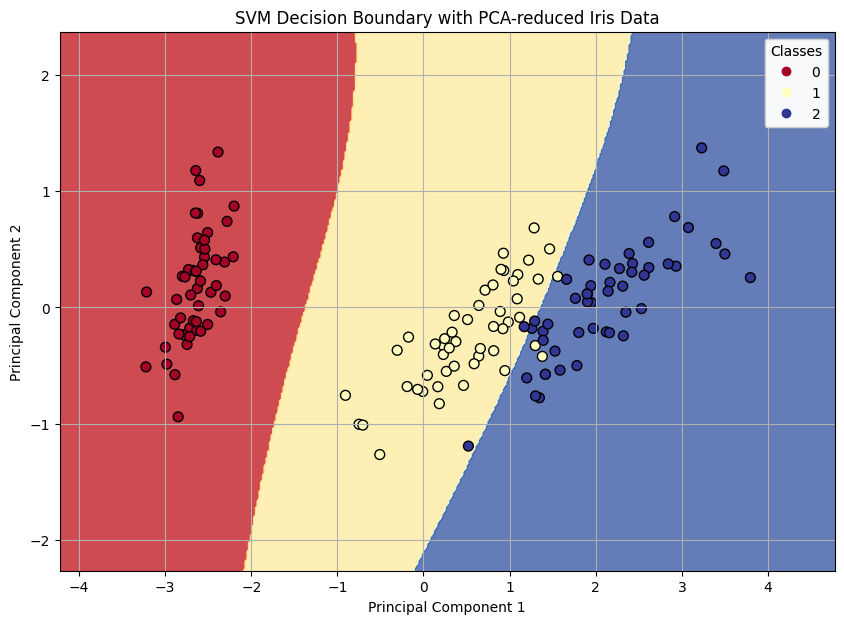

In [5]:
import matplotlib.pyplot as plt
import numpy as np


x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)


scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.RdYlBu, s=50, edgecolors='k')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA-reduced Iris Data')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.grid(True)
plt.show()

